In [ ]:
!pip install pynrrd

In [ ]:
!pip install patchify

In [ ]:
import os
import nrrd
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from patchify import patchify, unpatchify

In [ ]:
!pip install -U --no-cache-dir gdown --pre


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=5ffaa23db09f32cc5c3f67bd995929f47ce307beb6aed8cd694725ab7c669d1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ieozuzdx/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [ ]:
!gdown --id 1EZV7C_uQNUuNUBWpBeTpFMHxHp2W7FjH
!gdown --id 1kHTH1XCAw6Xoq-IxjQWK3UkP4w0Kdh2q
!gdown --id 18NhRXI-MktVHlE-CF379e0OhQWp23YL9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1EZV7C_uQNUuNUBWpBeTpFMHxHp2W7FjH
To: /content/PDDCA-1.4.1_part1.zip
100% 510M/510M [00:13<00:00, 36.8MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1kHTH1XCAw6Xoq-IxjQWK3UkP4w0Kdh2q 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `

In [ ]:
!gdown --id 1kHTH1XCAw6Xoq-IxjQWK3UkP4w0Kdh2q

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1kHTH1XCAw6Xoq-IxjQWK3UkP4w0Kdh2q
To: /content/PDDCA-1.4.1_part2.zip
100% 593M/593M [00:10<00:00, 56.2MB/s]


In [ ]:
from zipfile import ZipFile

zip_1="/content/PDDCA-1.4.1_part1.zip"
zip_2="/content/PDDCA-1.4.1_part2.zip"
zip_3="/content/PDDCA-1.4.1_part3.zip"

#os.mkdir('data') 

with ZipFile(zip_1, 'r') as ziip:
  ziip.extractall("/content/data")
  print('woow_1')
  
with ZipFile(zip_2, 'r') as ziip:
  ziip.extractall("/content/data")
  print('woow_1')
  
with ZipFile(zip_3, 'r') as ziip:
  ziip.extractall("/content/data")
  print('woow_1')

woow_1
woow_1
woow_1


In [ ]:
nrrd.reader.ALLOW_DUPLICATE_FIELD = True
numbers_for_photos=[]
CT_imgs=[]
brain_stem_masks=[]
chiasm_masks=[]
mandible_masks=[]
optic_nerve_L_masks=[]
optic_nerve_R_masks=[]
parotid_L_masks=[]
parotid_R_masks=[]
submandibular_L_masks=[]
submandibular_R_masks=[]


In [ ]:
CT_paths=glob('/content/data/*/img.nrrd')        #DON'T RUN
counter=0
for i in CT_paths:
    filedata, fileheader = nrrd.read(i)
    
    for j in range(0,filedata.shape[2]):            #as numbers of files change for each folder
        try:
          counter+=1
          CT_imgs.append(filedata[:,:,j])

        except:
          print(counter)
          print(i)
          print(j)

    j=0
    counter+=1
      

In [ ]:
len(CT_imgs)

7367

In [ ]:

for i in range(0,7367):
   CT_imgs[i]=cv2.resize(CT_imgs[i],(256,256))

In [ ]:
CT_imgs[0].shape

(256, 256)

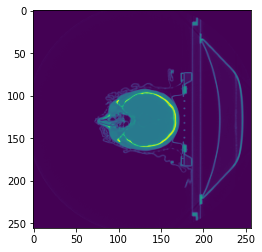

In [ ]:
plt.imshow(CT_imgs[100])
plt.show()

In [ ]:
brain_stem_paths=glob('/content/data/*/structures/BrainStem.nrrd')
counter=0
for i in brain_stem_paths:
    filedata, fileheader = nrrd.read(i)
    numbers_for_photos.append(filedata.shape[2])
    for j in range(0,filedata.shape[2]):            #as numbers of files change for each folder
        try:
          brain_stem_masks.append(filedata[:,:,j])
        except:
          print(counter)
          print(i)
          print(j)

    j=0
    counter+=1
   

In [ ]:
for i in range(0,7367):
    brain_stem_masks[i]=cv2.resize(brain_stem_masks[i],(256,256))

In [ ]:
B_masks=[]
for i in range(0,7367):
   img=np.zeros([256,256,3],dtype=np.uint8)
   im=brain_stem_masks[i]
   img[im==1]= (0,0,255) 
   B_masks.append(img)

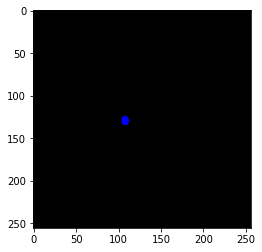

In [ ]:
plt.imshow(B_masks[670])

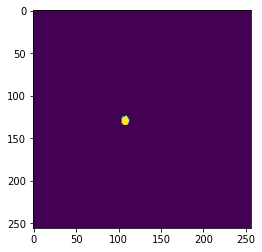

In [ ]:
plt.imshow(brain_stem_masks[670])

In [ ]:
del brain_stem_masks

In [ ]:
chiasm_stem_paths=glob('/content/data/*/structures/Chiasm.nrrd')
list1=[]
counter=0
for i in chiasm_stem_paths:
    filedata, fileheader = nrrd.read(i)

    for j in range(0,filedata.shape[2]):            #as numbers of files change for each folder
        try:          
          chiasm_masks.append(filedata[:,:,j])
        except:
          print(counter)
          print(i)
          print(j)

    j=0
    counter+=1

In [ ]:
len(chiasm_masks)

7367

In [ ]:
for i in range(0,7367):
   chiasm_masks[i]=cv2.resize(chiasm_masks[i],(256,256))

In [ ]:

C_masks=[]
for i in range(0,7367):
   img=np.zeros([256,256,3],dtype=np.uint8)
   im=chiasm_masks[i]
   img[im==1]= (0,255,0) 
   C_masks.append(img)

In [ ]:
del chiasm_masks

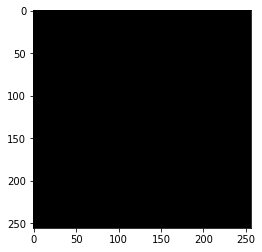

In [ ]:
plt.imshow(C_masks[2111])

In [ ]:
chiasm_masks[0].shape

In [ ]:
OpticNerve_L_paths=glob('/content/data/*/structures/OpticNerve_L.nrrd')
counter=0
for i in OpticNerve_L_paths:
  filedata, fileheader = nrrd.read(i)

  for j in range(0,filedata.shape[2]):            #as numbers of files change for each folder
        
        try:
          optic_nerve_L_masks.append(filedata[:,:,j])
        except:
          print(counter)
          print(i)
          print(j)

  j=0
  counter+=1

In [ ]:
len(optic_nerve_L_masks)

7367

In [ ]:
for i in range(0,7367):
   optic_nerve_L_masks[i]=cv2.resize(optic_nerve_L_masks[i],(256,256))

In [ ]:
onl_masks=[]
for i in range(0,7367):
   img=np.zeros([256,256,3],dtype=np.uint8)
   im=optic_nerve_L_masks[i]
   img[im==1]= [255,0,0]
   onl_masks.append(img)

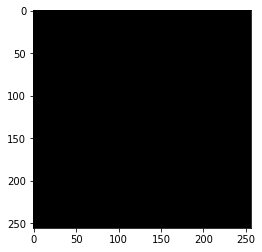

In [ ]:
plt.imshow(onl_masks[2111])

In [ ]:
del optic_nerve_L_masks

In [ ]:
OpticNerve_R_paths=glob('/content/data/*/structures/OpticNerve_R.nrrd')
counter=0
for i in OpticNerve_R_paths:
  filedata, fileheader = nrrd.read(i)

  for j in range(0,filedata.shape[2]):            #as numbers of files change for each folder
        
        try:
          optic_nerve_R_masks.append(filedata[:,:,j])
        except:
          print(counter)
          print(i)
          print(j)

  j=0
  counter+=1

In [ ]:
len(optic_nerve_R_masks)

7367

In [ ]:
for i in range(0,7367):
   optic_nerve_R_masks[i]=cv2.resize(optic_nerve_R_masks[i],(256,256))

In [ ]:
onr_masks=[]
for i in range(0,7367):
   img=np.zeros([256,256,3],dtype=np.uint8)
   im=optic_nerve_R_masks[i]
   img[im==1]= (255,255,0) 
   onr_masks.append(img)

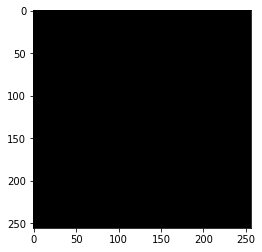

In [ ]:
plt.imshow(onr_masks[2111])

In [ ]:
del optic_nerve_R_masks

In [ ]:
Parotid_L_paths=glob('/content/data/*/structures/Parotid_L.nrrd')
counter=0
for i in Parotid_L_paths:
  filedata, fileheader = nrrd.read(i)

  for j in range(0,filedata.shape[2]):            #as numbers of files change for each folder
        
        try:
          parotid_L_masks.append(filedata[:,:,j])
        except:
          print(counter)
          print(i)
          print(j)

  j=0
  counter+=1

In [ ]:
len(parotid_L_masks)

7367

In [ ]:
for i in range(0,7367):
   parotid_L_masks[i]=cv2.resize(parotid_L_masks[i],(256,256))

In [ ]:
pL_masks=[]
for i in range(0,7367):
   img=np.zeros([256,256,3],dtype=np.uint8)
   im=parotid_L_masks[i]
   img[im==1]= (255,0,255) 
   pL_masks.append(img)

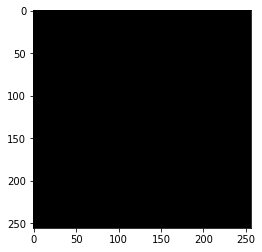

In [ ]:
plt.imshow(pL_masks[1111])

In [ ]:
Parotid_R_paths=glob('/content/data/*/structures/Parotid_R.nrrd')
counter=0
for i in Parotid_R_paths:
  filedata, fileheader = nrrd.read(i)

  for j in range(0,filedata.shape[2]):            #as numbers of files change for each folder
        
        try:
          parotid_R_masks.append(filedata[:,:,j])
        except:
          print(counter)
          print(i)
          print(j)

  j=0
  counter+=1

In [ ]:
len(parotid_R_masks)

7367

In [ ]:
for i in range(0,7367):
   parotid_R_masks[i]=cv2.resize(parotid_R_masks[i],(256,256))

In [ ]:
pR_masks=[]
for i in range(0,7367):
   img=np.zeros([256,256,3],dtype=np.uint8)
   im=parotid_R_masks[i]
   img[im==1]= (128,86,17) 
   pR_masks.append(img)

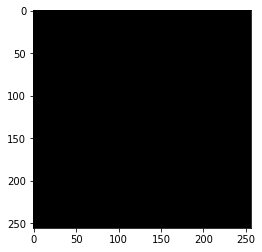

In [ ]:
plt.imshow(pR_masks[1111])

In [ ]:
len(pR_masks)

7367

**Inconsistent data**

In [ ]:
Submandibular_L_paths=glob('/content/data/*/structures/Submandibular_L.nrrd')

In [ ]:
Submandibular_L_paths=glob('/content/data/*/structures/Submandibular_L.nrrd')
counter=0
for i in Submandibular_L_paths:
  filedata, fileheader = nrrd.read(i)
  S=[]
  S.append(filedata.shape[2])
  for j in range(0,numbers_for_photos[counter]):            #as numbers of files change for each folder
        
        try:
          submandibular_L_masks.append(filedata[:,:,j])
        except:
          img=np.zeros([256,256],dtype=np.uint8)
          submandibular_L_masks.append(img)
          print(j)

  counter+=1

In [ ]:
counter

41

In [ ]:
len(Submandibular_L_paths)

41

In [ ]:
len(submandibular_L_masks)

6331

In [ ]:
plt.imshow(pR_masks[1111])

In [ ]:
all_masks=[]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
s=os.listdir("/content/drive/MyDrive/Copy of CT_Data/Masks/")
len(s)

7367

In [ ]:
ls=[3,113,150,167,252,294,334,445,471,515,525,536,553,556,561,602,605,617,618,633,663,669,682,718,742,746,748,753,756,759,825,858,867,886,898,903,904,928,943,985,1032,1045,1082,1108,1149,1197,1216,1228,1259,1295,1365,1367,1487,1556,1674,1692]

In [ ]:
for i in ls:
  print(i)
  one_IMG = cv2.addWeighted(B_masks[i],1,C_masks[i],1,1)
  twoimg=cv2.resize(one_IMG,(256,256))
  three = cv2.addWeighted(twoimg,1,onr_masks[i],1,1)
  four=cv2.resize(three,(256,256))
  threes = cv2.addWeighted(four,1,onl_masks[i],1,1)
  fours=cv2.resize(threes,(256,256))
  five = cv2.addWeighted(fours,1,pL_masks[i],1,1)
  six=cv2.resize(five,(256,256))
  all = cv2.addWeighted(six,1,pR_masks[i],1,1)
  masked=cv2.resize(all,(256,256))
  #all_masks.append(masked)
  cv2.imwrite('/content/drive/MyDrive/Copy of CT_Data/Masks/'+str(i)+'.png',masked)

3
113
150
167
252
294
334
445
471
515
525
536
553
556
561
602
605
617
618
633
663
669
682
718
742
746
748
753
756
759
825
858
867
886
898
903
904
928
943
985
1032
1045
1082
1108
1149
1197
1216
1228
1259
1295
1365
1367
1487
1556
1674
1692


In [ ]:
for i in range(len(CT_imgs)):
  ls=cv2.cvtColor(CT_imgs[i], cv2.COLOR_GRAY2RGB)
  ls=ls.astype(np.uint8)
  cv2.imwrite("/content/drive/MyDrive/CT_images/"+str(i)+".png",ls)